In [2]:
from src.dataOps.formatData import initialize_xslx_data
import pandas as  pd

In [12]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 962.6 kB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/home/nick/transportation/venv/bin/python3 -m pip install --upgrade pip' command.


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style()
sns.set_theme()

In [3]:
path = '../samples/Svodniy_otchet_po_chasam_intensivnost+skorost_01_01_2024_31_12_202411111111.xlsx'

In [4]:
initial_df = pd.read_excel(path, header=[2,3])
df = initialize_xslx_data(initial_df)

/home/nick/transportation/src/dataOps/formatData.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, 'coerce', dayfirst=True)


In [25]:
df.index.name = 'Дата и время'

In [ ]:
col = df['Общая интенсивность автомобилей']['Итого']
col

'Итого'

<Axes: xlabel='Дата и время'>

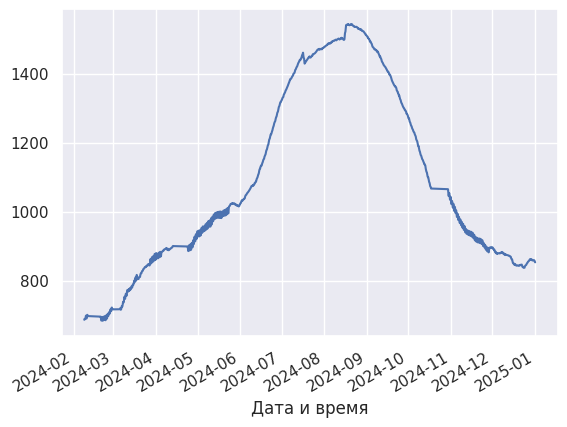

In [28]:
df['Общая интенсивность автомобилей']['Итого'].rolling(window=24*30).mean().plot()

/tmp/ipykernel_71301/3171149974.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col.resample('M').mean().plot(kind='bar', xlabel='Месяц', ylabel='Средняя интенсивность')


<Axes: xlabel='Месяц', ylabel='Средняя интенсивность'>

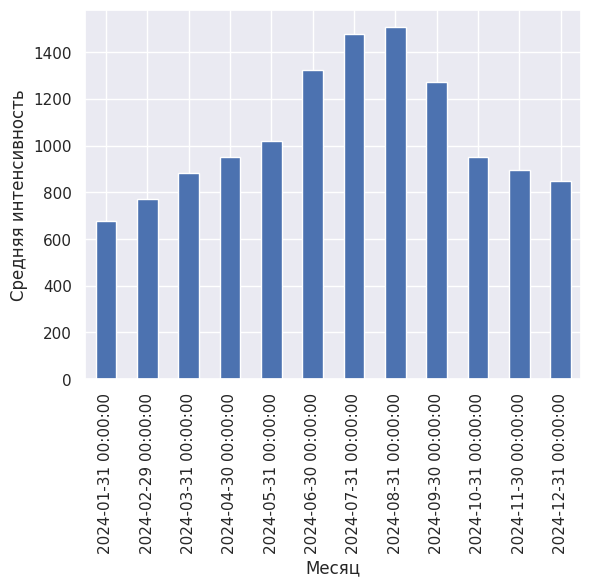

In [51]:
col.resample('M').mean().plot(kind='bar', xlabel='Месяц', ylabel='Средняя интенсивность')

In [ ]:
col.resample('M').mean().plot(
    kind='bar', xlabel='Месяц', ylabel='Средняя интенсивность')

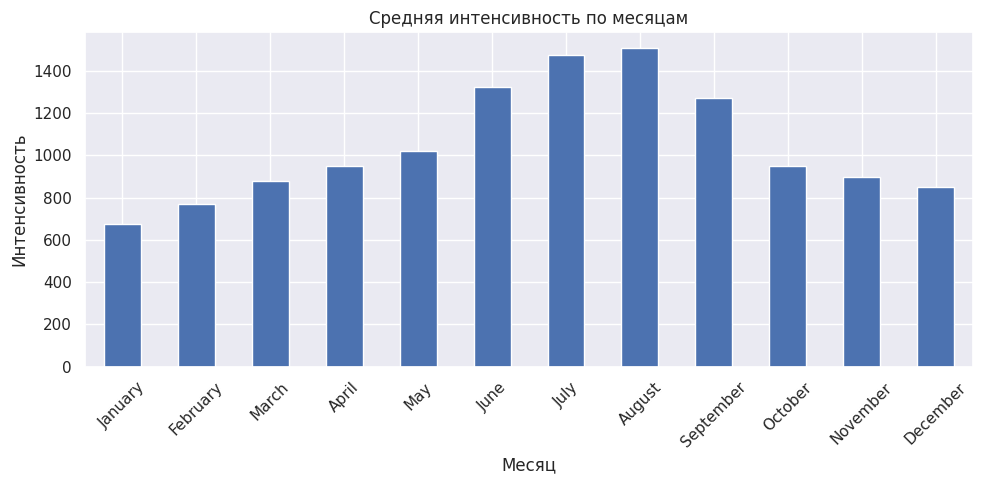

In [61]:
df2 = df['Общая интенсивность автомобилей'].copy()
df2['month'] = df2.index.month_name()
monthly_avg = df2.groupby('month')['Итого'].mean()

# Обеспечим правильный порядок месяцев
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(month_order)

# Строим график
monthly_avg.plot(kind='bar', figsize=(10, 5),
                 title='Средняя интенсивность по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Интенсивность')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

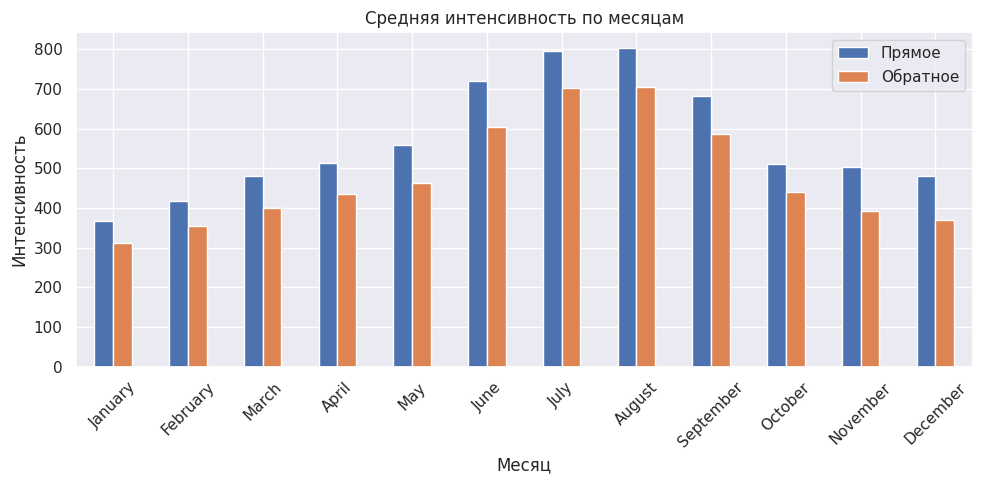

In [60]:
df2 = df['Общая интенсивность автомобилей'].copy()
df2['month'] = df2.index.month_name()
monthly_avg = df2.groupby('month')[['Прямое', 'Обратное']].mean()

# Обеспечим правильный порядок месяцев
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(month_order)

# Строим график
monthly_avg.plot(kind='bar', figsize=(10, 5),
                 title='Средняя интенсивность по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Интенсивность')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

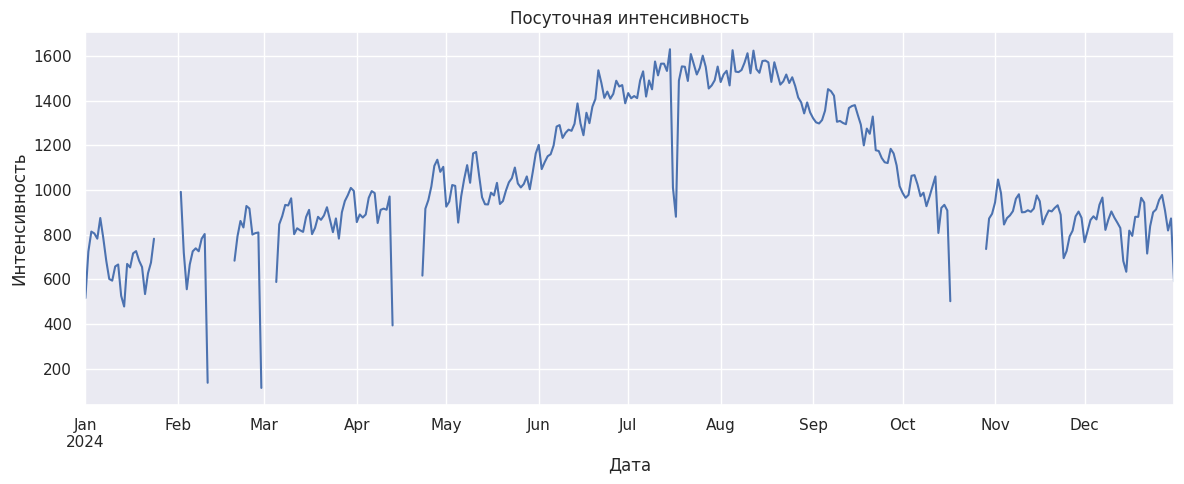

In [62]:
# или .sum() — если хотите суммарную интенсивность
daily_avg = col.resample('D').mean()

# Строим график
daily_avg.plot(figsize=(12, 5), title='Посуточная интенсивность')
plt.xlabel('Дата')
plt.ylabel('Интенсивность')
plt.grid(True)
plt.tight_layout()
plt.show()